**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo

---


Analista de dados: 
Isabela Felix França

---

Engenheiro de conhecimento: 
Daniel Campos da Silva

---


## Fazendo upload do dados do Kaggle

In [ ]:
# Faz upload do arquivo "kaggle.json" com API Token do perfil do usuário
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Testa se upload foi feito com sucesso
!ls

kaggle.json  sample_data


In [ ]:
# Move arquivo para a uma pasta e dá permissões ao sistema
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Fazendo download do dataset
! kaggle datasets download -d mitishaagarwal/patient

 60% 5.00M/8.30M [00:00<00:00, 9.44MB/s]
100% 8.30M/8.30M [00:00<00:00, 14.1MB/s]


In [ ]:
# Conferindo o download
!ls

kaggle.json  patient.zip  sample_data


## Transferindo os dados para planilha

In [ ]:
import zipfile
import pandas as pd
 
# Cria dataframe do pandas a partir do zip
dados_pacientes = pd.read_csv('patient.zip',compression='zip')

# Exibindo o começo do dataframe
dados_pacientes

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [ ]:
# A tabela veio com uma coluna Unnamed:83 que não apresenta valores. Logo de antemão ela será excluída

dados_pacientes = dados_pacientes.drop(["Unnamed: 83"], axis=1)
dados_pacientes

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


## Informações sobre o dados

O conjunto de dados possui informações de pacientes hospitalizados, seja fatores que levaram a internação, informação do hospital e do paciente em si.

### Descrição dos dados

*   Número de instâncias: 91713
*   Número de atributos: 85

Resumidamente, os atributos apresentam informações sobre o paciente, incluindo, presença de doenças como aids, diabetes, etc, se este realizou cirurgias, peso, etnia, altura, idade, gênero, índice de massa corporal, por qual meio o mesmo foi admitido, informações sobre pressão arterial, um identificador para o mesmo e se este chegou a óbito durante a internação. Já para o hospital, temos um identificador, tempo de permanência do paciente entre a unidade e admissão, e previsão probabilística de mortalidade.

Para mais informações sobre os atributos, a subseção "Informação sobre os atributos" pode ser visitada.

#### Informação sobre os atributos

*   encounter_id: Identificador único associado a uma estadia na unidade do paciente.
*   patient_id: Identificador exclusivo associado a um paciente.
*   hospital_id: Identificador exclusivo associado a um hospital.
*   age: A idade do paciente na admissão na unidade.
*   bmi: O índice de massa corporal da pessoa na admissão na unidade.
*   elective_surgery: Se o paciente foi internado no hospital para uma operação cirúrgica eletiva.
*   ethnicity: A tradição nacional ou cultural comum à qual a pessoa pertence.
*   gender: Sexo do paciente.
*   height: A altura da pessoa na admissão da unidade. 
*   icu_admit_source: A localização do paciente antes de ser admitido na unidade.
*   icu_id: Um identificador único para a unidade em que o paciente foi admitido.
*   icu_stay_type: indica se o paciente foi admitido, transferido ou outro.
*   icu_type: Uma classificação que indica o tipo de cuidado que a unidade é capaz de oferecer.
*   pre_icu_los_days: O tempo de permanência do paciente entre a admissão hospitalar e a admissão na unidade.
*   weight: O peso (massa corporal) da pessoa na admissão na unidade.
*   apache_2_diagnosis: O diagnóstico APACHE II para a admissão na UTI.
*   apache_3j_diagnosis: O código de subdiagnóstico APACHE III-J que melhor descreve o motivo da internação na UTI.
*   apache_post_operative: O status operacional do APACHE; 1 para pós-operatório, 0 para não-operatório.
*   arf_apache: Se o paciente teve insuficiência renal aguda durante as primeiras 24 horas de permanência na unidade, definida como débito urinário de 24 horas < 410ml, creatinina >= 133 micromol/L e sem diálise crônica.
*   gcs_eyes_apache: O componente de abertura ocular da Escala de Coma de Glasgow medido durante as primeiras 24 horas que resulta na pontuação mais alta do APACHE III.
*   gcs_motor_apache: O componente motor da Escala de Coma de Glasgow medido durante as primeiras 24 horas que resulta no maior escore APACHE III.
*   gcs_unable_apache: Se a Escala de Coma de Glasgow não pôde ser avaliada devido à sedação do paciente.
*   gcs_verbal_apache: O componente verbal da Escala de Coma de Glasgow medido durante as primeiras 24 horas que resulta na pontuação mais alta do APACHE III.
*   heart_rate_apache: A frequência cardíaca medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
*   intubated_apache: Se o paciente foi intubado no momento da gasometria arterial de maior pontuação usada no escore de oxigenação.
*   map_apache: A pressão arterial média medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
*   resprate_apache: A frequência respiratória medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
*   temp_apache: A temperatura medida durante as primeiras 24 horas que resulta na maior pontuação APACHE III.
*   ventilated_apache: Se o paciente foi ventilado de forma invasiva no momento da gasometria arterial com pontuação mais alta usando o algoritmo de pontuação de oxigenação, incluindo qualquer modo de ventilação com pressão positiva fornecida por meio de um circuito conectado a um tubo endotraqueal ou traqueostomia.
*   d1_diasbp_max: A pressão arterial diastólica mais alta do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva ou invasiva.
*   d1_diasbp_min: A pressão arterial diastólica mais baixa do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva ou invasiva.
*   d1_diasbp_noninvasive_max: A pressão arterial diastólica mais alta do paciente durante as primeiras 24 horas de sua permanência na unidade, medida de forma não invasiva.
*   d1_diasbp_noninvasive_min: A pressão arterial diastólica mais baixa do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva.
*   d1_heartrate_max: A frequência cardíaca mais alta do paciente durante as primeiras 24 horas de permanência na unidade.
*   d1_heartrate_min: A frequência cardíaca mais baixa do paciente durante as primeiras 24 horas de permanência na unidade.
*   d1_mbp_max: A pressão arterial média mais alta do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva ou invasiva.
*   d1_mbp_min: A pressão arterial média mais baixa do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva ou invasiva.
*   d1_mbp_noninvasive_max: A pressão arterial média mais alta do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva.
*   d1_mbp_noninvasive_min: A pressão arterial média mais baixa do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva.
*   d1_resprate_max: A maior frequência respiratória do paciente durante as primeiras 24 horas de permanência na unidade.
*   d1_resprate_min: A menor frequência respiratória do paciente durante as primeiras 24 horas de permanência na unidade.
*   d1_spo2_max: A saturação periférica de oxigênio mais alta do paciente durante as primeiras 24 horas de permanência na unidade.
*   d1_spo2_min: A saturação periférica de oxigênio mais baixa do paciente durante as primeiras 24 horas de permanência na unidade.
*   d1_sysbp_max: A pressão arterial sistólica mais alta do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva ou invasiva.
*   d1_sysbp_min: A pressão arterial sistólica mais baixa do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma não invasiva ou invasiva.
*   d1_sysbp_noninvasive_max: A pressão arterial sistólica mais alta do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma invasiva.
*   d1_sysbp_noninvasive_min: A pressão arterial sistólica mais baixa do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma invasiva.
*   d1_temp_max: A temperatura central mais alta do paciente durante as primeiras 24 horas de permanência na unidade, medida de forma invasiva.
*   d1_temp_min: A temperatura central mais baixa do paciente durante as primeiras 24 horas de permanência na unidade.
*   h1_diasbp_max: A pressão arterial diastólica mais alta do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva ou invasiva.
*   h1_diasbp_min: A pressão arterial diastólica mais baixa do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva ou invasiva.
*   h1_diasbp_noninvasive_max: A pressão arterial diastólica mais alta do paciente durante a primeira hora de permanência na unidade, medida de forma invasiva.
*   h1_diasbp_noninvasive_min: A pressão arterial diastólica mais baixa do paciente durante a primeira hora de permanência na unidade, medida de forma invasiva.
*   h1_heartrate_max: A frequência cardíaca mais alta do paciente durante a primeira hora de permanência na unidade.
*   h1_heartrate_min: A frequência cardíaca mais baixa do paciente durante a primeira hora de permanência na unidade.
*   h1_mbp_max: A pressão arterial média mais alta do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva ou invasiva.
*   h1_mbp_min: A pressão arterial média mais baixa do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva ou invasiva.
*   h1_mbp_noninvasive_max: A pressão arterial média mais alta do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva.
*   h1_mbp_noninvasive_min: A pressão arterial média mais baixa do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva.
*   h1_resprate_max: A maior frequência respiratória do paciente durante a primeira hora de sua permanência na unidade.
*   h1_resprate_min: A menor frequência respiratória do paciente durante a primeira hora de permanência na unidade.
*   h1_spo2_max: A saturação periférica de oxigênio mais alta do paciente durante a primeira hora de permanência na unidade.
*   h1_spo2_min: A saturação periférica de oxigênio mais baixa do paciente durante a primeira hora de permanência na unidade.
*   h1_sysbp_max: A pressão arterial sistólica mais alta do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva ou invasiva
*   h1_sysbp_min: A pressão arterial sistólica mais baixa do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva ou invasiva.
*   h1_sysbp_noninvasive_max: A pressão arterial sistólica mais alta do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva.
*   h1_sysbp_noninvasive_min: A pressão arterial sistólica mais baixa do paciente durante a primeira hora de permanência na unidade, medida de forma não invasiva.
*   d1_glucose_max: A maior concentração de glicose do paciente em seu soro ou plasma durante as primeiras 24 horas de sua permanência na unidade.
*   d1_glucose_min: A menor concentração de glicose do paciente em seu soro ou plasma durante as primeiras 24 horas de sua permanência na unidade.
*   d1_potassium_max: A maior concentração de potássio para o paciente em seu soro ou plasma durante as primeiras 24 horas de sua permanência na unidade.
*   d1_potassium_min: A concentração mais baixa de potássio para o paciente em seu soro ou plasma durante as primeiras 24 horas de sua permanência na unidade.
*   apache_4a_hospital_death_prob: A previsão probabilística APACHE IVa de mortalidade hospitalar para o paciente que utiliza o escore APACHE III e outras covariáveis, incluindo diagnóstico. 
*   apache_4a_icu_death_prob: A previsão probabilística APACHE IVa de mortalidade na UTI para o paciente que utiliza o escore APACHE III e outras covariáveis, incluindo diagnóstico. 
*   aids: Se o paciente tem um diagnóstico definitivo de síndrome da imunodeficiência adquirida (AIDS) (não apenas HIV positivo)
*   cirrhosis: Se o paciente tem histórico de uso pesado de álcool com hipertensão portal e varizes, outras causas de cirrose com evidência de hipertensão portal e varizes, ou cirrose comprovada por biópsia. Essa comorbidade não se aplica a pacientes com transplante de fígado funcionante.
*   diabetes_mellitus: Se o paciente foi diagnosticado com diabetes, de início juvenil ou adulto, o que requer medicação.
*   hepatic_failure: Se o paciente tem cirrose e complicações adicionais, incluindo icterícia e ascite, sangramento GI superior, encefalopatia hepática ou coma.
*   immunosuppression: Se o paciente tem seu sistema imunológico suprimido dentro de seis meses antes da admissão na UTI por qualquer um dos seguintes motivos; radioterapia, quimioterapia, uso de drogas imunossupressoras não citotóxicas, esteróides em altas doses (pelo menos 0,3 mg/kg/dia de metilprednisolona ou equivalente por pelo menos 6 meses).
*   leukemia: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.
*   lymphoma: Se o paciente foi diagnosticado com linfoma não Hodgkin.
*   solid_tumor_with_metastasis: Se o paciente foi diagnosticado com qualquer carcinoma de tumor sólido (incluindo melanoma maligno) que tenha evidência de metástase.
*   apache_3j_bodysystem: Grupo de diagnóstico de admissão para APACHE III.
*   apache_2_bodysystem: Grupo de diagnóstico de admissão para APACHE II.
*   chave: campo null.
*   hospital_death: Se o paciente morreu durante esta hospitalização.


## Analisando os tipos de dados presente na tabela

In [ ]:
dados_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [ ]:
def return_classes_from_atributos(lista):
  return list(dict.fromkeys(lista))

tipos_ethnicity = return_classes_from_atributos(dados_pacientes.ethnicity)
tipos_gender = return_classes_from_atributos(dados_pacientes.gender)
tipos_icu_admit_source = return_classes_from_atributos(dados_pacientes.icu_admit_source)
tipos_icu_stay_type = return_classes_from_atributos(dados_pacientes.icu_stay_type)
tipos_icu_type = return_classes_from_atributos(dados_pacientes.icu_type)
tipos_apache_3j_bodysystem = return_classes_from_atributos(dados_pacientes.apache_3j_bodysystem)
tipos_apache_2_bodysystem = return_classes_from_atributos(dados_pacientes.apache_2_bodysystem)

print("ethnicity: {}".format(tipos_ethnicity))
print("gender: {}".format(tipos_gender))
print("icu_admit_source: {}".format(tipos_icu_admit_source))
print("icu_stay_type: {}".format(tipos_icu_stay_type))
print("icu_type: {}".format(tipos_icu_type))
print("apache_3j_bodysystem: {}".format(tipos_apache_3j_bodysystem))
print("apache_2_bodysystem: {}".format(tipos_apache_2_bodysystem))

ethnicity: ['Caucasian', nan, 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']
gender: ['M', 'F', nan]
icu_admit_source: ['Floor', 'Accident & Emergency', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU', nan]
icu_stay_type: ['admit', 'readmit', 'transfer']
icu_type: ['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU', 'Cardiac ICU', 'CSICU']
apache_3j_bodysystem: ['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma', 'Neurological', 'Gastrointestinal', 'Genitourinary', nan, 'Hematological', 'Musculoskeletal/Skin', 'Gynecological']
apache_2_bodysystem: ['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma', 'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', nan, 'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses']


## Analisando a quantidade de mortes

In [ ]:
dados_pacientes.hospital_death.value_counts(normalize=True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

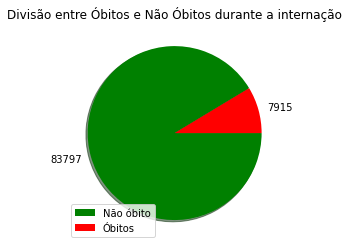

In [ ]:
import matplotlib.pyplot as plt

total_pacientes = 91713
values = [int(total_pacientes * 0.913698), int(total_pacientes * 0.086302)]
colors = ['g', 'r']
labels = ['Não óbito', 'Óbitos']
plt.pie(values, colors=colors, labels=values, counterclock=False, shadow=True)
plt.title('Divisão entre Óbitos e Não Óbitos durante a internação')
plt.legend(labels,loc=3)
plt.show()

Apenas 8% dos internados vão a óbito.

# Dados Gerais

* Total de pacientes: 91713
* Total de óbitos: 7915
* Total de não óbitos: 83797

## Separando as internação com e sem óbito

In [ ]:
dados_pacientes_obito = dados_pacientes[dados_pacientes.hospital_death == 1]
dados_pacientes_vivo = dados_pacientes[dados_pacientes.hospital_death == 0]

In [ ]:
# Internações  que levaram a óbito
dados_pacientes_obito

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
8,80471,10577,118,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1
25,29208,114628,118,68.0,26.010703,0,Caucasian,F,165.1,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,1
46,40903,55564,118,64.0,16.980389,0,Caucasian,M,180.3,Operating Room / Recovery,...,0.0,0.0,1.0,0.0,0.0,1.0,Neurological,Neurologic,NaN,1
58,80233,83826,81,55.0,NaN,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,1
73,75834,43161,118,74.0,25.311715,0,Caucasian,M,167.6,Accident & Emergency,...,1.0,0.0,0.0,1.0,0.0,0.0,Hematological,Haematologic,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91602,69810,89181,30,19.0,20.308204,0,Caucasian,M,177.8,Other Hospital,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1
91611,95137,103841,30,74.0,32.622159,0,Caucasian,M,170.2,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1
91620,129975,40159,195,NaN,21.067554,0,Caucasian,M,162.6,Floor,...,0.0,0.0,1.0,0.0,1.0,0.0,Sepsis,Cardiovascular,NaN,1
91691,96280,27717,184,59.0,29.384757,0,Caucasian,F,165.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1


In [ ]:
# Internações que NÃO levaram a óbito
dados_pacientes_vivo

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


# Analisando Internações

## Por sexo


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.gender.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.gender.value_counts()))

Óbitos:
M    4176
F    3731
Name: gender, dtype: int64

Não Óbitos:
M    45293
F    38488
Name: gender, dtype: int64


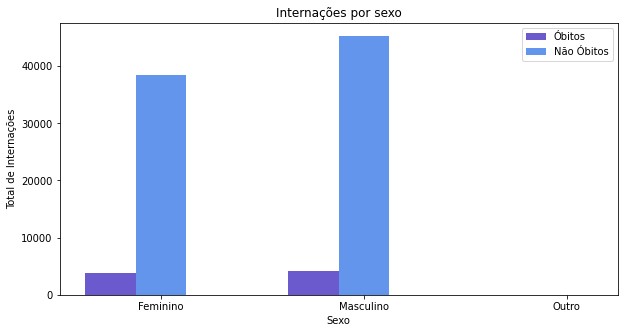

In [ ]:
qtd_pacientes_mortos_masculino = len(dados_pacientes_obito[dados_pacientes_obito.gender == 'M'])
qtd_pacientes_mortos_feminino = len(dados_pacientes_obito[dados_pacientes_obito.gender == 'F'])
qtd_pacientes_mortos_sexo_outro = 7915 - qtd_pacientes_mortos_masculino - qtd_pacientes_mortos_feminino

qtd_pacientes_vivo_masculino = len(dados_pacientes_vivo[dados_pacientes_vivo.gender == 'M'])
qtd_pacientes_vivo_feminino = len(dados_pacientes_vivo[dados_pacientes_vivo.gender == 'F'])
qtd_pacientes_vivo_sexo_outro = 83797 - qtd_pacientes_vivo_masculino - qtd_pacientes_vivo_feminino

obitos = [qtd_pacientes_mortos_feminino, qtd_pacientes_mortos_masculino, qtd_pacientes_mortos_sexo_outro]
vivos = [qtd_pacientes_vivo_feminino, qtd_pacientes_vivo_masculino, qtd_pacientes_vivo_sexo_outro]

barWidth = 0.25
plt.figure(figsize=(10,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#6A5ACD', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#6495ED', width=barWidth, label='Não Óbitos')

plt.xlabel('Sexo')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Feminino', 'Masculino', 'Outro'])
plt.ylabel('Total de Internações')

plt.title('Internações por sexo')

plt.legend()
plt.show()

É possível ver que a não há diferença significativa na quantidade de óbitos por sexo. Já a quantidade de internações sem óbito é maior para o sexo masculino que feminino.

## Por etnia

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.ethnicity.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.ethnicity.value_counts()))

Óbitos:
Caucasian           6168
African American     750
Hispanic             376
Other/Unknown        353
Asian                 93
Native American       70
Name: ethnicity, dtype: int64

Não Óbitos:
Caucasian           64516
African American     8797
Other/Unknown        4021
Hispanic             3420
Asian                1036
Native American       718
Name: ethnicity, dtype: int64


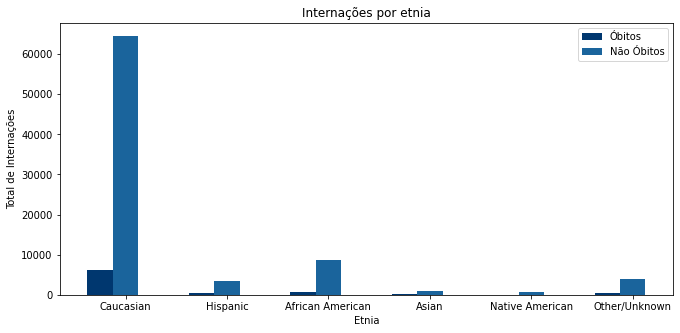

In [ ]:
qtd_pacientes_mortos_caucasian = len(dados_pacientes_obito[dados_pacientes_obito.ethnicity == 'Caucasian'])
qtd_pacientes_mortos_hispanic = len(dados_pacientes_obito[dados_pacientes_obito.ethnicity == 'Hispanic'])
qtd_pacientes_mortos_african = len(dados_pacientes_obito[dados_pacientes_obito.ethnicity == 'African American'])
qtd_pacientes_mortos_asian = len(dados_pacientes_obito[dados_pacientes_obito.ethnicity == 'Asian'])
qtd_pacientes_mortos_native = len(dados_pacientes_obito[dados_pacientes_obito.ethnicity == 'Native American'])
qtd_pacientes_mortos_other = len(dados_pacientes_obito[dados_pacientes_obito.ethnicity == 'Other/Unknown'])

qtd_pacientes_vivo_caucasian = len(dados_pacientes_vivo[dados_pacientes_vivo.ethnicity == 'Caucasian'])
qtd_pacientes_vivo_hispanic = len(dados_pacientes_vivo[dados_pacientes_vivo.ethnicity == 'Hispanic'])
qtd_pacientes_vivo_african = len(dados_pacientes_vivo[dados_pacientes_vivo.ethnicity == 'African American'])
qtd_pacientes_vivo_asian = len(dados_pacientes_vivo[dados_pacientes_vivo.ethnicity == 'Asian'])
qtd_pacientes_vivo_native = len(dados_pacientes_vivo[dados_pacientes_vivo.ethnicity == 'Native American'])
qtd_pacientes_vivo_other = len(dados_pacientes_vivo[dados_pacientes_vivo.ethnicity == 'Other/Unknown'])


obitos = [
          qtd_pacientes_mortos_caucasian, 
          qtd_pacientes_mortos_hispanic, 
          qtd_pacientes_mortos_african,
          qtd_pacientes_mortos_asian,
          qtd_pacientes_mortos_native,
          qtd_pacientes_mortos_other
]

vivos = [
          qtd_pacientes_vivo_caucasian, 
          qtd_pacientes_vivo_hispanic, 
          qtd_pacientes_vivo_african,
          qtd_pacientes_vivo_asian,
          qtd_pacientes_vivo_native,
          qtd_pacientes_vivo_other
]

barWidth = 0.25
plt.figure(figsize=(11,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#00376F', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#1A649c', width=barWidth, label='Não Óbitos')

plt.xlabel('Etnia')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Caucasian', 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown'])
plt.ylabel('Total de Internações')

plt.title('Internações por etnia')

plt.legend()
plt.show()


Para etnias, já é possível verificar variação entre os dados. Pacientes de etnia caucasiana tem um maior número de mortes, porém também tem uma maior número de internações. Desta forma, este pode ser um fator relevante.

## Por tipo de admissão do paciente

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.icu_admit_source.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.icu_admit_source.value_counts()))

Óbitos:
Accident & Emergency         4670
Floor                        2094
Operating Room / Recovery     698
Other Hospital                317
Other ICU                     124
Name: icu_admit_source, dtype: int64

Não Óbitos:
Accident & Emergency         49390
Operating Room / Recovery    18015
Floor                        13517
Other Hospital                2041
Other ICU                      735
Name: icu_admit_source, dtype: int64


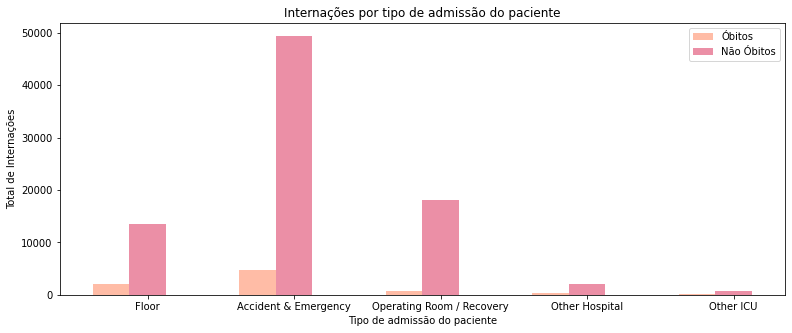

In [ ]:
qtd_pacientes_mortos_floor = len(dados_pacientes_obito[dados_pacientes_obito.icu_admit_source == 'Floor'])
qtd_pacientes_mortos_accident = len(dados_pacientes_obito[dados_pacientes_obito.icu_admit_source == 'Accident & Emergency'])
qtd_pacientes_mortos_operation = len(dados_pacientes_obito[dados_pacientes_obito.icu_admit_source == 'Operating Room / Recovery'])
qtd_pacientes_mortos_ohospital = len(dados_pacientes_obito[dados_pacientes_obito.icu_admit_source == 'Other Hospital'])
qtd_pacientes_mortos_oicu = len(dados_pacientes_obito[dados_pacientes_obito.icu_admit_source == 'Other ICU'])

qtd_pacientes_vivo_floor = len(dados_pacientes_vivo[dados_pacientes_vivo.icu_admit_source == 'Floor'])
qtd_pacientes_vivo_accident = len(dados_pacientes_vivo[dados_pacientes_vivo.icu_admit_source == 'Accident & Emergency'])
qtd_pacientes_vivo_operation = len(dados_pacientes_vivo[dados_pacientes_vivo.icu_admit_source == 'Operating Room / Recovery'])
qtd_pacientes_vivo_ohospital = len(dados_pacientes_vivo[dados_pacientes_vivo.icu_admit_source == 'Other Hospital'])
qtd_pacientes_vivo_oicu = len(dados_pacientes_vivo[dados_pacientes_vivo.icu_admit_source == 'Other ICU'])


obitos = [
          qtd_pacientes_mortos_floor, 
          qtd_pacientes_mortos_accident, 
          qtd_pacientes_mortos_operation,
          qtd_pacientes_mortos_ohospital,
          qtd_pacientes_mortos_oicu
]

vivos = [
          qtd_pacientes_vivo_floor, 
          qtd_pacientes_vivo_accident, 
          qtd_pacientes_vivo_operation,
          qtd_pacientes_vivo_ohospital,
          qtd_pacientes_vivo_oicu
]

barWidth = 0.25
plt.figure(figsize=(13,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#FFBCA6', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#EB8FA6', width=barWidth, label='Não Óbitos')

plt.xlabel('Tipo de admissão do paciente')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Floor', 'Accident & Emergency', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU'])
plt.ylabel('Total de Internações')

plt.title('Internações por tipo de admissão do paciente')

plt.legend()
plt.show()


Também é possível observar que a maior quantidade de óbito é originada de acidentes e emergência, assim como, a de não óbitos.

## Por forma de entrada do paciente

A razão entre o total de pacientes e os que vão a óbitos de acordo com o tipo de entrada é de 8% dos admitidos, 10% dos transferidos e 8% dos readmitidos.

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.icu_stay_type.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.icu_stay_type.value_counts()))

Óbitos:
admit       7340
transfer     525
readmit       50
Name: icu_stay_type, dtype: int64

Não Óbitos:
admit       78843
transfer     4445
readmit       510
Name: icu_stay_type, dtype: int64


In [ ]:
dados_pacientes.icu_stay_type.value_counts(normalize=True)

admit       0.939703
transfer    0.054191
readmit     0.006106
Name: icu_stay_type, dtype: float64

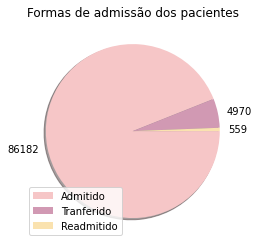

In [ ]:
import matplotlib.pyplot as plt

total_pacientes = 91713
values = [int(total_pacientes * 0.939703), int(total_pacientes * 0.054191), int(total_pacientes * 0.006106)]
colors = ['#F6C6C7', '#D199B3', '#FAE2AF']
labels = ['Admitido', 'Tranferido', 'Readmitido']
plt.pie(values, colors=colors, labels=values, counterclock=False, shadow=True)
plt.title('Formas de admissão dos pacientes')
plt.legend(labels,loc=3)
plt.show()

### Por forma de entrada do paciente - Óbito

In [ ]:
dados_pacientes_obito.icu_stay_type.value_counts(normalize=True)

admit       0.927353
transfer    0.066330
readmit     0.006317
Name: icu_stay_type, dtype: float64

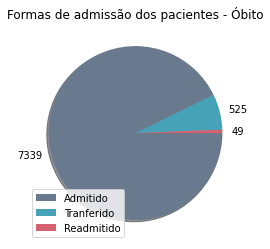

In [ ]:
total_pacientes = len(dados_pacientes_obito)
values = [int(total_pacientes * 0.927353), int(total_pacientes * 0.066330), int(total_pacientes * 0.006317)]
colors = ['#6A7A8E', '#46A2B7', '#D56170']
labels = ['Admitido', 'Tranferido', 'Readmitido']
plt.pie(values, colors=colors, labels=values, counterclock=False, shadow=True)
plt.title('Formas de admissão dos pacientes - Óbito')
plt.legend(labels,loc=3)
plt.show()

### Por forma de entrada do paciente - Não Óbito

In [ ]:
dados_pacientes_vivo.icu_stay_type.value_counts(normalize=True)

admit       0.940870
transfer    0.053044
readmit     0.006086
Name: icu_stay_type, dtype: float64

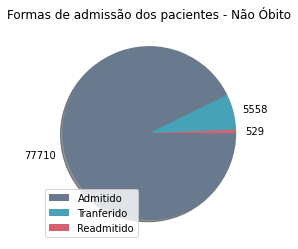

In [ ]:
total_pacientes = len(dados_pacientes_vivo)
values = [int(total_pacientes * 0.927353), int(total_pacientes * 0.066330), int(total_pacientes * 0.006317)]
colors = ['#6A7A8E', '#46A2B7', '#D56170']
labels = ['Admitido', 'Tranferido', 'Readmitido']
plt.pie(values, colors=colors, labels=values, counterclock=False, shadow=True)
plt.title('Formas de admissão dos pacientes - Não Óbito')
plt.legend(labels,loc=3)
plt.show()

## Por forma de tipo de cuidado que pode ser provido

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.icu_type.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.icu_type.value_counts()))

Óbitos:
Med-Surg ICU    4426
MICU             930
Neuro ICU        638
CCU-CTICU        542
Cardiac ICU      494
SICU             390
CSICU            254
CTICU            241
Name: icu_type, dtype: int64

Não Óbitos:
Med-Surg ICU    46160
Neuro ICU        7037
MICU             6765
CCU-CTICU        6614
SICU             4819
CSICU            4359
Cardiac ICU      4282
CTICU            3762
Name: icu_type, dtype: int64


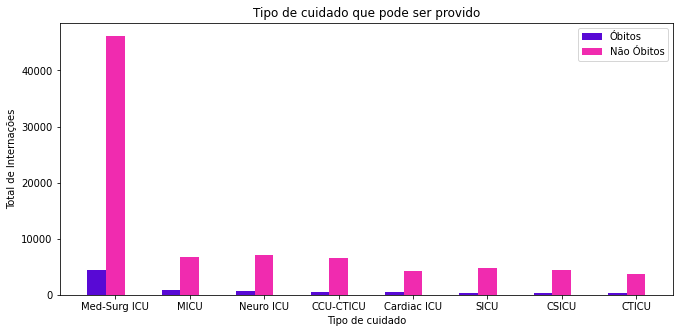

In [ ]:
obitos = [4426, 930, 638, 542, 494, 390, 254, 241]
vivos = [46160, 6765, 7037, 6614, 4282, 4819, 4359, 3762]

barWidth = 0.25
plt.figure(figsize=(11,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#5809D5', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#F02BAF', width=barWidth, label='Não Óbitos')

plt.xlabel('Tipo de cuidado')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Med-Surg ICU', 'MICU', 'Neuro ICU', 'CCU-CTICU', 'Cardiac ICU', 'SICU', 'CSICU', 'CTICU'])
plt.ylabel('Total de Internações')

plt.title('Tipo de cuidado que pode ser provido')

plt.legend()
plt.show()


## Por grupo de diagnóstico de admissão para APACHE III


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.apache_3j_bodysystem.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.apache_3j_bodysystem.value_counts()))

Óbitos:
Cardiovascular          2390
Sepsis                  1854
Respiratory             1301
Neurological             940
Gastrointestinal         670
Trauma                   259
Genitourinary            134
Metabolic                116
Hematological             58
Musculoskeletal/Skin      55
Gynecological              2
Name: apache_3j_bodysystem, dtype: int64

Não Óbitos:
Cardiovascular          27609
Neurological            10956
Respiratory             10308
Sepsis                   9886
Gastrointestinal         8356
Metabolic                7534
Trauma                   3583
Genitourinary            2038
Musculoskeletal/Skin     1111
Hematological             580
Gynecological             311
Name: apache_3j_bodysystem, dtype: int64


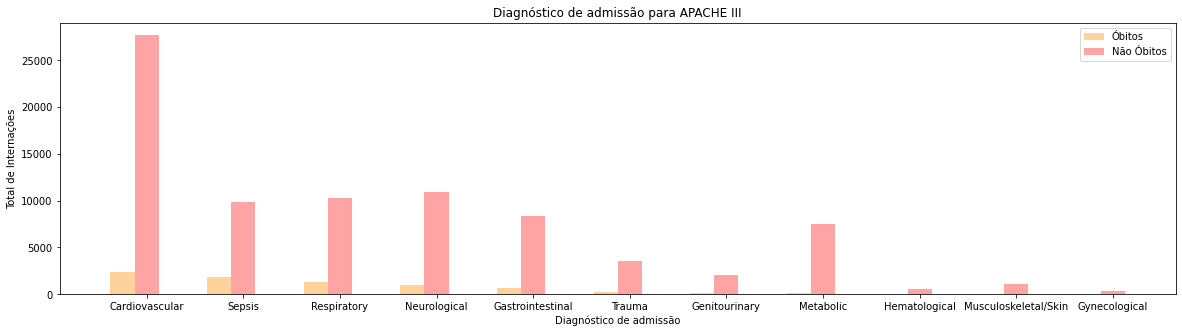

In [ ]:
obitos = [2390, 1854, 1301, 940, 670, 259, 134, 116, 58, 55, 2]
vivos = [27609, 9886, 10308, 10956, 8356, 3583, 2038, 7534, 580, 1111, 311]

barWidth = 0.25
plt.figure(figsize=(20,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#FDD39B', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#FFA4A4', width=barWidth, label='Não Óbitos')

plt.xlabel('Diagnóstico de admissão')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Cardiovascular', 'Sepsis', 'Respiratory', 'Neurological', 'Gastrointestinal', 'Trauma', 'Genitourinary', 'Metabolic', 'Hematological', 'Musculoskeletal/Skin', 'Gynecological'])
plt.ylabel('Total de Internações')

plt.title('Diagnóstico de admissão para APACHE III')

plt.legend()
plt.show()

## Por grupo de diagnóstico de admissão para APACHE II

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.apache_2_bodysystem.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.apache_2_bodysystem.value_counts()))

Óbitos:
Cardiovascular         4207
Respiratory            1301
Neurologic              940
Gastrointestinal        670
Trauma                  259
Renal/Genitourinary     136
Metabolic               116
Undefined diagnoses      74
Haematologic             58
Undefined Diagnoses      18
Name: apache_2_bodysystem, dtype: int64

Não Óbitos:
Cardiovascular         34609
Neurologic             10956
Respiratory            10308
Gastrointestinal        8356
Metabolic               7534
Undefined diagnoses     3694
Trauma                  3583
Renal/Genitourinary     2324
Haematologic             580
Undefined Diagnoses      328
Name: apache_2_bodysystem, dtype: int64


In [ ]:
# Devido a escrita em minúsculo de Undefined diagnoses e Undefined Diagnoses, somarei a os valores e posteriormente corrigirei a tabela

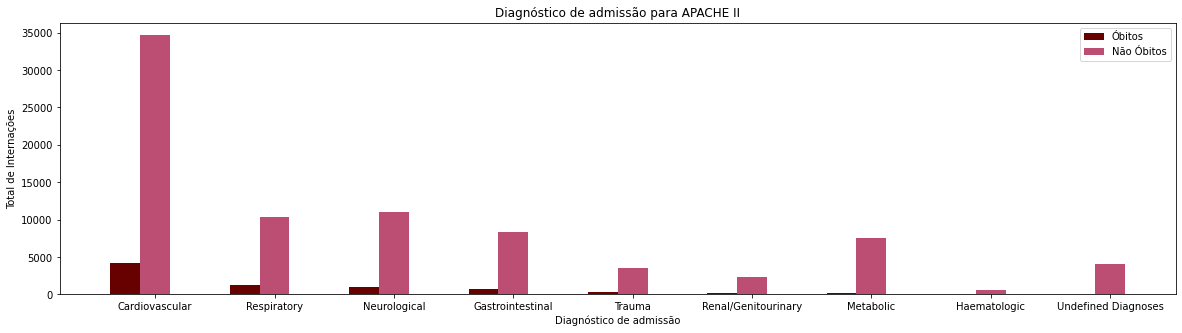

In [ ]:
obitos = [4207, 1301, 940, 670, 259, 136, 116, 58, 92]
vivos = [34609, 10308, 10956, 8356, 3583, 2324, 7534, 580, 4022]

barWidth = 0.25
plt.figure(figsize=(20,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#670100', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#BD4E73', width=barWidth, label='Não Óbitos')

plt.xlabel('Diagnóstico de admissão')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Cardiovascular', 'Respiratory', 'Neurological', 'Gastrointestinal', 'Trauma', 'Renal/Genitourinary', 'Metabolic', 'Haematologic', 'Undefined Diagnoses'])
plt.ylabel('Total de Internações')

plt.title('Diagnóstico de admissão para APACHE II')

plt.legend()
plt.show()

## Por idade

In [ ]:
dados_pacientes_obito.age.describe()

count    7273.000000
mean       68.494156
std        14.428363
min        16.000000
25%        60.000000
50%        71.000000
75%        80.000000
max        89.000000
Name: age, dtype: float64

In [ ]:
dados_pacientes_vivo.age.describe()

count    80212.000000
mean        61.748741
std         16.860137
min         16.000000
25%         52.000000
50%         64.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64

## Por índice de massa muscular

In [ ]:
dados_pacientes_obito.bmi.describe()

count    7552.000000
mean       28.340398
std         8.752581
min        14.844926
25%        22.575554
50%        26.635816
75%        32.195205
max        67.814990
Name: bmi, dtype: float64

In [ ]:
dados_pacientes_vivo.bmi.describe()

count    80732.000000
mean        29.264902
std          8.224677
min         14.844926
25%         23.738662
50%         27.768126
75%         32.992923
max         67.814990
Name: bmi, dtype: float64

## Por admissão para cirurgia

Do total de pacientes que foram a óbitos, apenas 7% dos destes haviam sido admitidos para cirurgias. É uma quantidade baixa.

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.elective_surgery.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.elective_surgery.value_counts()))

Óbitos:
0    7394
1     521
Name: elective_surgery, dtype: int64

Não Óbitos:
0    67468
1    16330
Name: elective_surgery, dtype: int64


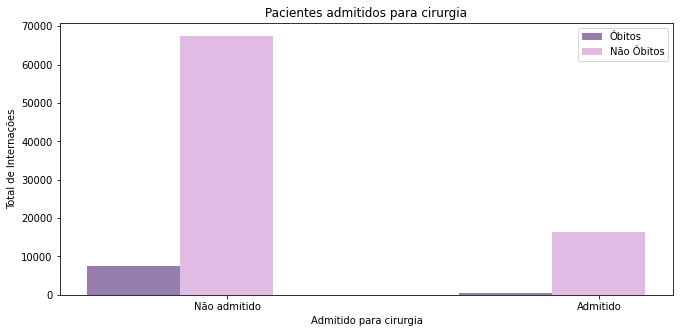

In [ ]:
obitos = [7394, 521]
vivos = [67468, 16330]

barWidth = 0.25
plt.figure(figsize=(11,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#957DAD', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#E0BBE4', width=barWidth, label='Não Óbitos')

plt.xlabel('Admitido para cirurgia')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Não admitido', 'Admitido'])
plt.ylabel('Total de Internações')

plt.title('Pacientes admitidos para cirurgia')

plt.legend()
plt.show()

## Por índice de massa muscular

In [ ]:
dados_pacientes_obito.height.describe()

count    7725.000000
mean      168.952094
std        10.844577
min       137.200000
25%       161.000000
50%       168.000000
75%       177.800000
max       195.590000
Name: height, dtype: float64

In [ ]:
dados_pacientes_vivo.height.describe()

count    82654.000000
mean       169.706029
std         10.788583
min        137.200000
25%        162.500000
50%        170.100000
75%        177.800000
max        195.590000
Name: height, dtype: float64

## Tempo de permanência do paciente entre a admissão hospitalar e a admissão na unidade

In [ ]:
dados_pacientes_obito.pre_icu_los_days.describe()

count    7915.000000
mean        1.348287
std         3.552382
min       -13.775000
25%         0.035417
50%         0.139583
75%         0.795139
max        84.367361
Name: pre_icu_los_days, dtype: float64

In [ ]:
dados_pacientes_vivo.pre_icu_los_days.describe()

count    83798.000000
mean         0.787357
std          2.356807
min        -24.947222
25%          0.035417
50%          0.138889
75%          0.397222
max        159.090972
Name: pre_icu_los_days, dtype: float64

## Por peso

In [ ]:
dados_pacientes_obito.weight.describe()

count    7674.000000
mean       80.904978
std        25.969574
min        38.600000
25%        63.500000
50%        77.000000
75%        93.000000
max       186.000000
Name: weight, dtype: float64

In [ ]:
dados_pacientes_vivo.weight.describe()

count    81319.000000
mean        84.323088
std         24.899124
min         38.600000
25%         67.100000
50%         80.800000
75%         97.500000
max        186.000000
Name: weight, dtype: float64

## O status operacional do APACHE

In [ ]:
dados_pacientes_obito.apache_post_operative.describe()

count    7674.000000
mean       80.904978
std        25.969574
min        38.600000
25%        63.500000
50%        77.000000
75%        93.000000
max       186.000000
Name: weight, dtype: float64

In [ ]:
dados_pacientes_vivo.apache_post_operative.describe()

count    81319.000000
mean        84.323088
std         24.899124
min         38.600000
25%         67.100000
50%         80.800000
75%         97.500000
max        186.000000
Name: weight, dtype: float64

## Diagnóstico APACHE 2

In [ ]:
dados_pacientes_obito.apache_2_diagnosis.describe()

count    7779.000000
mean      160.254274
std        78.718141
min       101.000000
25%       113.000000
50%       114.000000
75%       212.000000
max       308.000000
Name: apache_2_diagnosis, dtype: float64

In [ ]:
dados_pacientes_vivo.apache_2_diagnosis.describe()

count    82272.000000
mean       187.779488
std         86.334355
min        101.000000
25%        113.000000
50%        123.000000
75%        302.000000
max        308.000000
Name: apache_2_diagnosis, dtype: float64

## Subdiagnóstico  APACHE III-J

In [ ]:
dados_pacientes_obito.apache_3j_diagnosis.describe()

count    7786.000000
mean      421.149669
std       372.007242
min         0.180000
25%       107.010000
50%       401.010000
75%       501.050000
max      2201.050000
Name: apache_3j_diagnosis, dtype: float64

In [ ]:
dados_pacientes_vivo.apache_3j_diagnosis.describe()

count    82826.000000
mean       571.101236
std        468.883339
min          0.010000
25%        204.010000
50%        410.010000
75%        704.010000
max       2201.050000
Name: apache_3j_diagnosis, dtype: float64

## Por falha renal

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.arf_apache.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.arf_apache.value_counts()))

Óbitos:
0.0    7496
1.0     334
Name: arf_apache, dtype: int64

Não Óbitos:
0.0    80956
1.0     2212
Name: arf_apache, dtype: int64


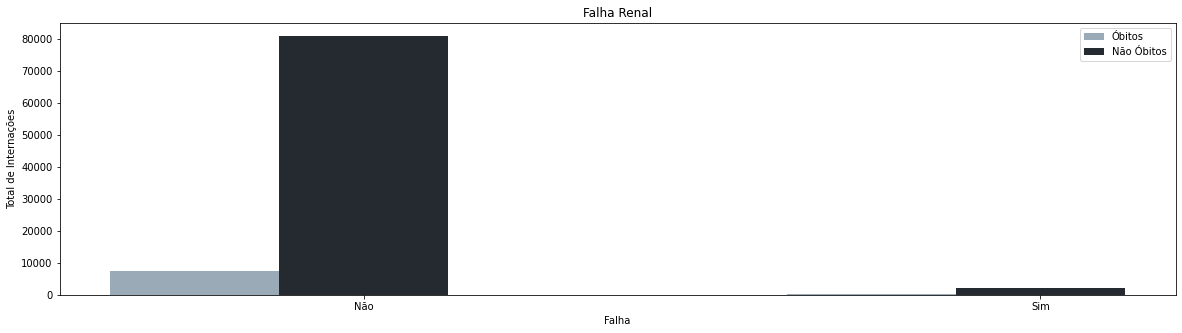

In [ ]:
obitos = [7496, 334]
vivos = [80956, 2212]

barWidth = 0.25
plt.figure(figsize=(20,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#9AAAB6', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#242A2F', width=barWidth, label='Não Óbitos')

plt.xlabel('Falha')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Não', 'Sim'])
plt.ylabel('Total de Internações')

plt.title('Falha Renal')

plt.legend()
plt.show()

## Por intubação

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.intubated_apache.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.intubated_apache.value_counts()))

Óbitos:
0.0    5063
1.0    2767
Name: intubated_apache, dtype: int64

Não Óbitos:
0.0    72174
1.0    10994
Name: intubated_apache, dtype: int64


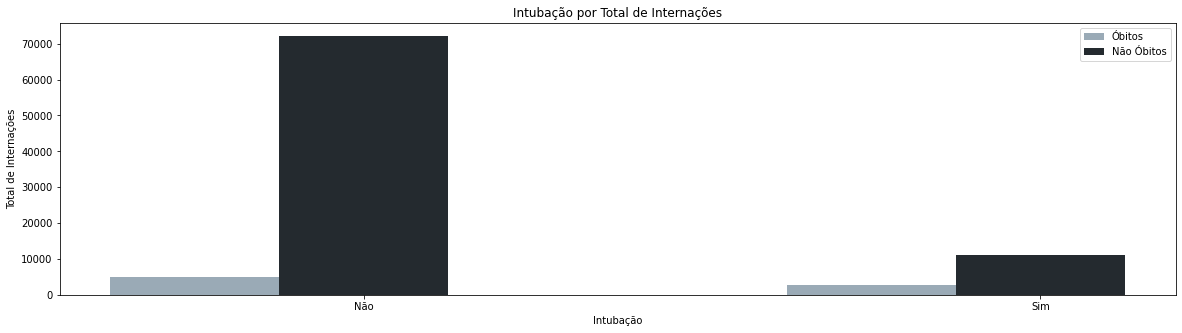

In [ ]:
obitos = [5063, 2767]
vivos = [72174, 10994]

barWidth = 0.25
plt.figure(figsize=(20,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#9AAAB6', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#242A2F', width=barWidth, label='Não Óbitos')

plt.xlabel('Intubação')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Não', 'Sim'])
plt.ylabel('Total de Internações')

plt.title('Intubação por Total de Internações')

plt.legend()
plt.show()

## Por ventilação de forma invasiva

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.ventilated_apache.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.ventilated_apache.value_counts()))

Óbitos:
1.0    5285
0.0    2545
Name: ventilated_apache, dtype: int64

Não Óbitos:
0.0    58813
1.0    24355
Name: ventilated_apache, dtype: int64


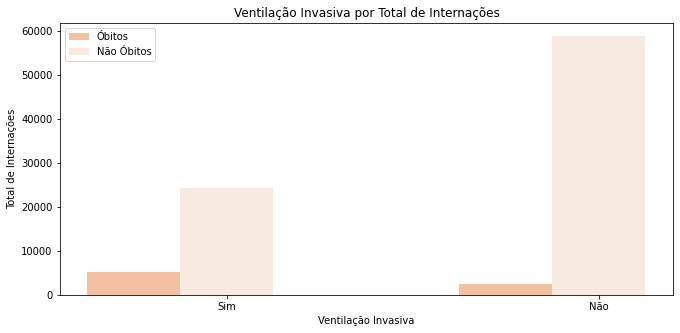

In [ ]:
obitos = [5285, 2545]
vivos = [24355, 58813]

barWidth = 0.25
plt.figure(figsize=(11,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#F3C0A1', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#F7EAE0', width=barWidth, label='Não Óbitos')

plt.xlabel('Ventilação Invasiva')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Sim', 'Não'])
plt.ylabel('Total de Internações')

plt.title('Ventilação Invasiva por Total de Internações')

plt.legend()
plt.show()

## Por doenças

In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.solid_tumor_with_metastasis.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.solid_tumor_with_metastasis.value_counts()))

Óbitos:
0.0    7483
1.0     347
Name: solid_tumor_with_metastasis, dtype: int64

Não Óbitos:
0.0    81637
1.0     1531
Name: solid_tumor_with_metastasis, dtype: int64


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.lymphoma.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.lymphoma.value_counts()))

Óbitos:
0.0    7767
1.0      63
Name: lymphoma, dtype: int64

Não Óbitos:
0.0    82855
1.0      313
Name: lymphoma, dtype: int64


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.leukemia.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.leukemia.value_counts()))

Óbitos:
0.0    7711
1.0     119
Name: leukemia, dtype: int64

Não Óbitos:
0.0    82644
1.0      524
Name: leukemia, dtype: int64


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.immunosuppression.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.immunosuppression.value_counts()))

Óbitos:
0.0    7446
1.0     384
Name: immunosuppression, dtype: int64

Não Óbitos:
0.0    81171
1.0     1997
Name: immunosuppression, dtype: int64


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.hepatic_failure.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.hepatic_failure.value_counts()))

Óbitos:
0.0    7616
1.0     214
Name: hepatic_failure, dtype: int64

Não Óbitos:
0.0    82200
1.0      968
Name: hepatic_failure, dtype: int64


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.diabetes_mellitus.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.diabetes_mellitus.value_counts()))

Óbitos:
0.0    6235
1.0    1595
Name: diabetes_mellitus, dtype: int64

Não Óbitos:
0.0    64271
1.0    18897
Name: diabetes_mellitus, dtype: int64


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.cirrhosis.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.cirrhosis.value_counts()))

Óbitos:
0.0    7582
1.0     248
Name: cirrhosis, dtype: int64

Não Óbitos:
0.0    81988
1.0     1180
Name: cirrhosis, dtype: int64


In [ ]:
print('Óbitos:\n{}'.format(dados_pacientes_obito.aids.value_counts()))
print('\nNão Óbitos:\n{}'.format(dados_pacientes_vivo.aids.value_counts()))

Óbitos:
0.0    7820
1.0      10
Name: aids, dtype: int64

Não Óbitos:
0.0    83100
1.0       68
Name: aids, dtype: int64


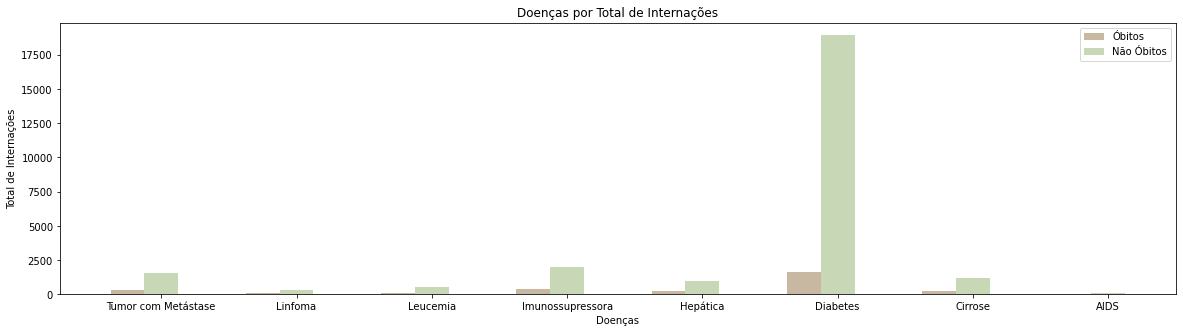

In [ ]:
obitos = [347, 63, 119, 384, 214, 1595, 248, 10]
vivos = [1531, 313, 524, 1994, 968, 18897, 1180, 68]

barWidth = 0.25
plt.figure(figsize=(20,5))

r1 = np.arange(len(obitos))
r2 = [x + barWidth for x in r1]

plt.bar(r1, obitos, color='#C8B8A1', width=barWidth, label='Óbitos')
plt.bar(r2, vivos, color='#C8D8B7', width=barWidth, label='Não Óbitos')

plt.xlabel('Doenças')
plt.xticks([r + barWidth for r in range(len(obitos))], ['Tumor com Metástase', 'Linfoma', 'Leucemia', 'Imunossupressora', 'Hepática', 'Diabetes', 'Cirrose', 'AIDS'])
plt.ylabel('Total de Internações')

plt.title('Doenças por Total de Internações')

plt.legend()
plt.show()

## Por APACHE IVa predição probabilística de mortalidade na UTI

In [ ]:
dados_pacientes_obito.apache_4a_icu_death_prob.describe()

count    7363.000000
mean        0.242726
std         0.325432
min        -1.000000
25%         0.060000
50%         0.180000
75%         0.435000
max         0.970000
Name: apache_4a_icu_death_prob, dtype: float64

In [ ]:
dados_pacientes_vivo.apache_4a_icu_death_prob.describe()

count    76403.000000
mean         0.024799
std          0.193417
min         -1.000000
25%          0.010000
50%          0.020000
75%          0.050000
max          0.950000
Name: apache_4a_icu_death_prob, dtype: float64

## A predição probabilística APACHE IVa de mortalidade hospitalar

In [ ]:
dados_pacientes_obito.apache_4a_hospital_death_prob.describe()

count    7363.000000
mean        0.334838
std         0.354252
min        -1.000000
25%         0.130000
50%         0.300000
75%         0.580000
max         0.990000
Name: apache_4a_hospital_death_prob, dtype: float64

In [ ]:
dados_pacientes_vivo.apache_4a_hospital_death_prob.describe()

count    76403.000000
mean         0.062882
std          0.220461
min         -1.000000
25%          0.020000
50%          0.040000
75%          0.110000
max          0.970000
Name: apache_4a_hospital_death_prob, dtype: float64

## Por nível de pressão, potássio, glicose, respiração, frequência cardíaca

In [ ]:
dados_aux_mortos = dados_pacientes_obito[
      [
        'd1_potassium_min',
        'd1_potassium_max',
        'd1_glucose_min',
        'd1_glucose_max',
        'h1_sysbp_noninvasive_min',
        'h1_sysbp_noninvasive_max',
        'h1_sysbp_min',
        'h1_sysbp_max',
        'h1_spo2_min',
        'h1_spo2_max',
        'h1_resprate_min',
        'h1_resprate_max',
        'h1_mbp_noninvasive_min',
        'h1_mbp_noninvasive_max',
        'h1_mbp_min',
        'h1_mbp_max',
        'h1_heartrate_min',
        'h1_heartrate_max',
        'h1_diasbp_noninvasive_min',
        'h1_diasbp_noninvasive_max',
        'h1_diasbp_min',
        'h1_diasbp_max',
        'd1_temp_min',
        'd1_temp_max',
        'd1_sysbp_noninvasive_min',
        'd1_sysbp_noninvasive_max',
        'd1_sysbp_min',
        'd1_sysbp_max',
        'd1_spo2_min',
        'd1_spo2_max',
        'd1_resprate_min',
        'd1_resprate_max',
        'd1_mbp_noninvasive_min',
        'd1_mbp_noninvasive_max',
        'd1_mbp_min',
        'd1_mbp_max',
        'd1_heartrate_min',
        'd1_heartrate_max',
        'd1_diasbp_noninvasive_min',
        'd1_diasbp_noninvasive_max',
        'd1_diasbp_min',
        'd1_diasbp_max',
      ]
]
dados_aux_mortos.describe()

,d1_potassium_min,d1_potassium_max,d1_glucose_min,d1_glucose_max,h1_sysbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_min,h1_sysbp_max,h1_spo2_min,h1_spo2_max,...,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,d1_mbp_min,d1_mbp_max,d1_heartrate_min,d1_heartrate_max,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,d1_diasbp_min,d1_diasbp_max
count,7120.000000,7120.000000,7452.000000,7452.000000,7445.000000,7445.000000,7634.000000,7634.000000,7542.000000,7542.000000,...,7786.000000,7786.000000,7886.000000,7886.000000,7895.000000,7895.000000,7806.000000,7806.000000,7884.000000,7884.000000
mean,3.981840,4.495199,118.092056,197.580784,103.784688,126.996105,103.758187,127.092350,92.832273,97.548130,...,54.954020,103.499229,54.902993,103.516358,70.121976,114.679164,42.427492,88.777223,42.371512,88.614916
std,0.753313,0.863238,49.202065,96.503589,28.739944,30.422855,28.706988,30.485851,9.921498,4.614197,...,16.725044,23.705267,16.681928,23.836511,25.678292,24.855102,14.283038,22.655908,14.244271,22.653266
min,2.400000,2.800000,33.000000,73.000000,53.000000,75.000000,53.000000,75.000000,0.000000,13.000000,...,22.000000,60.000000,22.000000,60.000000,0.000000,58.000000,13.000000,46.000000,13.000000,46.000000
25%,3.500000,3.900000,87.000000,131.000000,83.000000,105.000000,83.000000,105.000000,91.000000,97.000000,...,44.000000,87.000000,44.000000,87.000000,59.000000,97.000000,33.000000,73.000000,33.000000,73.000000
50%,3.900000,4.400000,111.000000,171.000000,101.000000,122.000000,101.000000,122.000000,95.000000,99.000000,...,54.000000,101.000000,54.000000,101.000000,72.000000,114.000000,43.000000,86.000000,43.000000,86.000000
75%,4.500000,5.000000,140.000000,235.000000,122.000000,145.000000,122.000000,146.000000,99.000000,100.000000,...,65.000000,116.000000,65.000000,116.000000,86.000000,131.000000,51.000000,100.000000,51.000000,100.000000
max,5.800000,7.000000,288.000000,611.000000,195.000000,223.000000,194.000000,223.000000,100.000000,100.000000,...,112.000000,181.000000,112.000000,184.000000,155.000000,177.000000,90.000000,165.000000,90.000000,165.000000


In [ ]:
dados_aux_vivos = dados_pacientes_vivo[
      [
        'd1_potassium_min',
        'd1_potassium_max',
        'd1_glucose_min',
        'd1_glucose_max',
        'h1_sysbp_noninvasive_min',
        'h1_sysbp_noninvasive_max',
        'h1_sysbp_min',
        'h1_sysbp_max',
        'h1_spo2_min',
        'h1_spo2_max',
        'h1_resprate_min',
        'h1_resprate_max',
        'h1_mbp_noninvasive_min',
        'h1_mbp_noninvasive_max',
        'h1_mbp_min',
        'h1_mbp_max',
        'h1_heartrate_min',
        'h1_heartrate_max',
        'h1_diasbp_noninvasive_min',
        'h1_diasbp_noninvasive_max',
        'h1_diasbp_min',
        'h1_diasbp_max',
        'd1_temp_min',
        'd1_temp_max',
        'd1_sysbp_noninvasive_min',
        'd1_sysbp_noninvasive_max',
        'd1_sysbp_min',
        'd1_sysbp_max',
        'd1_spo2_min',
        'd1_spo2_max',
        'd1_resprate_min',
        'd1_resprate_max',
        'd1_mbp_noninvasive_min',
        'd1_mbp_noninvasive_max',
        'd1_mbp_min',
        'd1_mbp_max',
        'd1_heartrate_min',
        'd1_heartrate_max',
        'd1_diasbp_noninvasive_min',
        'd1_diasbp_noninvasive_max',
        'd1_diasbp_min',
        'd1_diasbp_max',
      ]
]

dados_aux_vivos.describe()

,d1_potassium_min,d1_potassium_max,d1_glucose_min,d1_glucose_max,h1_sysbp_noninvasive_min,h1_sysbp_noninvasive_max,h1_sysbp_min,h1_sysbp_max,h1_spo2_min,h1_spo2_max,...,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,d1_mbp_min,d1_mbp_max,d1_heartrate_min,d1_heartrate_max,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,d1_diasbp_min,d1_diasbp_max
count,75008.00000,75008.000000,78454.000000,78454.000000,76927.000000,76927.000000,80468.000000,80468.000000,79986.000000,79986.000000,...,82448.000000,82448.000000,83607.000000,83607.000000,83673.000000,83673.000000,82867.000000,82867.000000,83664.000000,83664.000000
mean,3.93018,4.228471,114.028437,172.458791,117.785017,133.641036,117.558048,133.831324,95.395144,98.091454,...,65.884715,104.693504,65.812145,104.758393,70.340707,101.898629,50.978773,88.594809,50.895379,88.480278
std,0.56013,0.640893,37.048788,85.377826,26.080391,27.328725,25.977240,27.190730,6.179476,3.043614,...,15.267277,20.391770,15.249214,20.496582,16.074318,21.404130,13.009738,19.502576,12.988322,19.507937
min,2.40000,2.800000,33.000000,73.000000,53.000000,75.000000,53.000000,75.000000,0.000000,0.000000,...,22.000000,60.000000,22.000000,60.000000,0.000000,58.000000,13.000000,46.000000,13.000000,46.000000
25%,3.60000,3.800000,91.000000,116.000000,99.000000,114.000000,99.000000,114.000000,94.000000,97.000000,...,56.000000,91.000000,56.000000,91.000000,60.000000,87.000000,42.000000,75.000000,42.000000,75.000000
50%,3.90000,4.100000,107.000000,148.000000,116.000000,131.000000,116.000000,131.000000,96.000000,99.000000,...,65.000000,102.000000,65.000000,102.000000,69.000000,100.000000,51.000000,87.000000,51.000000,86.000000
75%,4.30000,4.500000,130.000000,198.000000,135.000000,150.000000,134.000000,150.000000,99.000000,100.000000,...,75.000000,116.000000,75.000000,116.000000,80.000000,115.000000,59.000000,99.000000,59.000000,99.000000
max,5.80000,7.000000,288.000000,611.000000,195.000000,223.000000,194.000000,223.000000,100.000000,100.000000,...,112.000000,181.000000,112.000000,184.000000,175.000000,177.000000,90.000000,165.000000,90.000000,165.000000


# Analisando relação entre os atributos

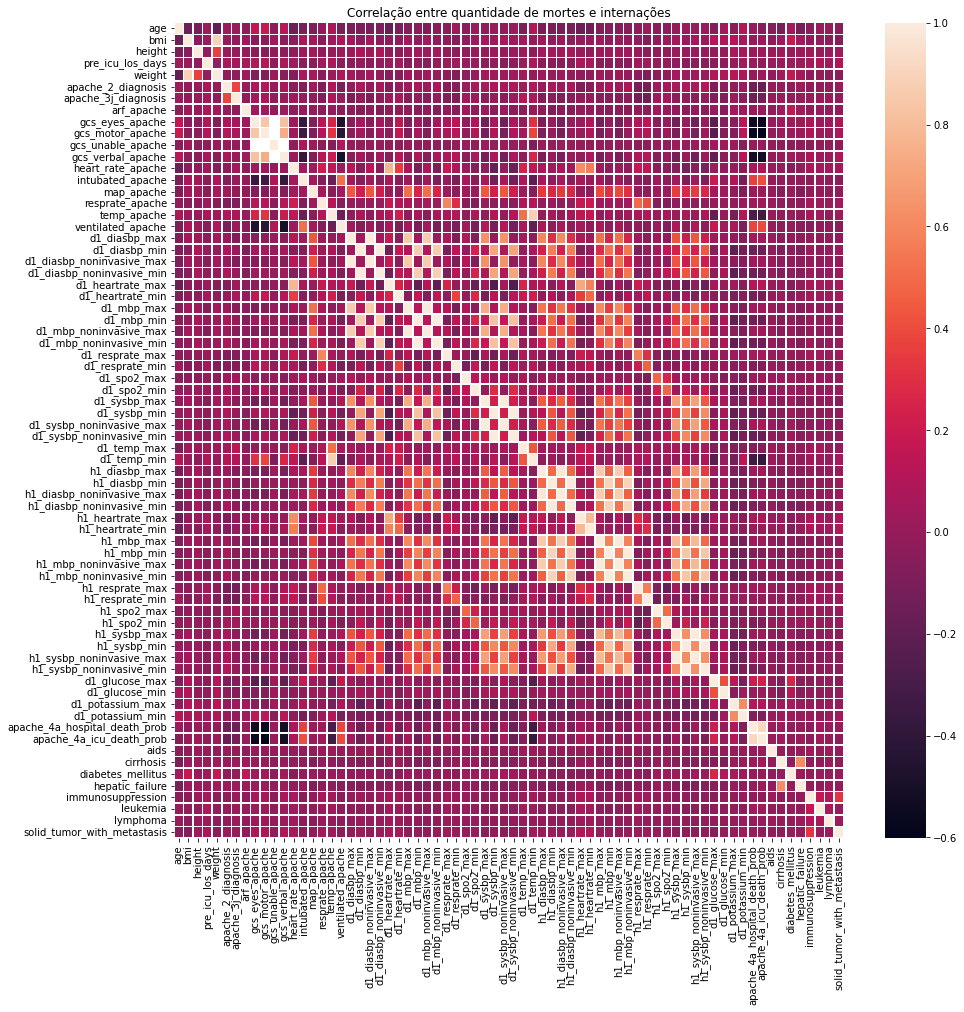

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15)) 
obitos = dados_pacientes_obito.loc[:, dados_pacientes_obito.dtypes=='float64'].corr()
heatmap_frauds = sns.heatmap(obitos, xticklabels=obitos.columns, yticklabels=obitos.columns, ax=ax, linewidths=.5)
ax.set_title("Correlação entre quantidade de mortes e internações")
plt.show()

# Resultados

Após a análise dos gráficos, foi concluído que:

* As colunas de identificação devem ser excluídas pois não fornecem informação que auxiliará, na tomada de decisão. São elas: encounter_id, patient_id, hospital_id, icu_id.

* Outros atributos que não fornecem valor tão descritivo para classificação, são: age, bmi, height, pre_icu_los_days,weight, apache_2_diagnosis, apache_3j_diagnosis, d1_glucose_max, d1_glucose_min, d1_potassium_max e d1_potassium_min. Seus valores são muito próximo, para óbitos e não óbitos, e/ou não possuem muita correlação com os demais atributos que fornecem bom resultado para classificação.

Logo, a tabela resultante pode ser vista abaixo.


In [ ]:
# Corrigir escrita errada na planilha
dados_pacientes.apache_2_bodysystem = dados_pacientes.apache_2_bodysystem.replace('Undefined diagnoses', 'Undefined Diagnoses')

# Colunas de identificação de chave primária não são necessárias
dados_pacientes = dados_pacientes.drop(['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3_diagnosis', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min'], axis=1)

dados_pacientes

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,0,Caucasian,M,Floor,admit,CTICU,0,0.0,3.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,0,Caucasian,F,Floor,admit,Med-Surg ICU,0,0.0,1.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,0,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,0,0.0,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,1,Caucasian,F,Operating Room / Recovery,admit,CTICU,1,0.0,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,Caucasian,M,Floor,admit,Cardiac ICU,0,0.0,4.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,0,Caucasian,F,Floor,admit,Med-Surg ICU,0,0.0,4.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0,0.0,3.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,0,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,0,0.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
